In [36]:
# 导入numpy库，用于进行科学计算
import numpy as np

# 导入matplotlib.pyplot库，用于数据可视化
import matplotlib.pyplot as plt

# 导入sympy库，用于符号数学计算
import sympy as sp

# 导入IPython.display模块，用于在Jupyter Notebook中显示数学公式和LaTeX
from IPython.display import display

# 雅可比迭代法（Jacobi Iteration）
## 概述
雅可比迭代法是一种求解线性方程组的迭代方法，特别适用于大型稀疏矩阵的求解。它基于将原方程组分解为对角占优的形式，通过迭代逐步逼近方程组的真实解。给定一个线性方程组 $Ax=b$，其中 $A$ 是一个$n \times n$的矩阵，$x$ 和 $b$ 分别是$n$维列向量。

## 基本原理
假设矩阵 $A$ 可以被分解为对角部分 $D$、上三角部分 $U$ 和下三角部分 $L$，即 $A = D + L + U$，其中 $D$ 是 $A$ 的对角线元素组成的对角矩阵。雅可比迭代法通过固定其他项，依次更新每一个未知数的估计值来逼近真实解。

## 迭代公式

$$ x^{(k+1)} = D^{-1}(b - (L + U)x^{(k)}) $$

其中，$x^{(k)}$ 表示第$k$次迭代的解向量估计，$x^{(k+1)}$ 是基于当前估计的下一次迭代解。

## 步骤
* 初始化：选择一个初始解向量 $x^{(0)}$，通常可以取全零向量或根据问题背景给出的合理猜测。

* 迭代计算：对于每一个未知数 $x_i$，根据上述迭代公式计算其新的估计值。

* 收敛判断：重复步骤2，直到满足某种收敛准则，如两次连续迭代解的差的范数小于预设的容差 $\epsilon$，即 $||x^{(k+1)} - x^{(k)}|| < \epsilon$。

* 结果输出：当达到收敛条件时，输出最终的解向量 $x$。

## 收敛性与加速
* 收敛条件：雅可比迭代法在矩阵 $A$ 的谱半径（最大特征值的模）小于1时收敛，且当矩阵是对角占优时收敛速度较快。

* 加速技巧：为了提高收敛速度，可以采用松弛因子 $\omega > 1$ 调整迭代公式为 $x^{(k+1)} = \omega D^{-1}(b - (L + U)x^{(k)})$，这种方法称为超松弛雅可比迭代,我们将会在下文介绍到它。

In [37]:
def diag(A):
    """
    Extracts the diagonal elements of a square matrix A into a new matrix D.

    Parameters:
    A (np.ndarray): A square matrix.

    Returns:
    np.ndarray: A matrix containing only the diagonal elements of A.
    """
    
    
    D = np.zeros((A.shape[0],A.shape[1]))
    
    for i in range(A.shape[0]):
        D[i,i] = A[i, i]
    
    return D

def diag_inv(A):
    """
    Inverses the diagonal elements of a square matrix A into a new matrix D.

    Parameters:
    A (np.ndarray): A square matrix whose diagonal elements are non-zero.

    Returns:
    np.ndarray: A matrix containing the inverse of the diagonal elements of A.
    """
   
    
    D = np.zeros((A.shape[0],A.shape[1]))
    
    for i in range(A.shape[0]):
        D[i,i] = 1/A[i, i]
        
    return D

def tril(A,index = 0):
    """
    Extracts the lower triangular part of matrix A (including the diagonal) into a new matrix L.

    Parameters:
    A (np.ndarray): Any matrix.
    index (int, optional): The subdiagonal index to extract. Default is 0.

    Returns:
    np.ndarray: The lower triangular part of A.
    """

    n=len(A)
    
    L = np.zeros_like(A)
    
    for i in range(index,n):
        for j in range(0,i+1-index):
            L[i,j] = A[i,j]
            
    return L

def triu(A,index = 0):
    """
    Extracts the upper triangular part of matrix A (including the diagonal) into a new matrix U.

    Parameters:
    A (np.ndarray): Any matrix.
    index (int, optional): The superdiagonal index to extract. Default is 0.

    Returns:
    np.ndarray: The upper triangular part of A.
    """

    n=len(A)
    
    U = np.zeros_like(A)
    
    for j in range(index,n):
        for i in range(0,j+1-index):
            U[i,j] = A[i,j]
            
    return U

def Jacobi_iteration(A, b, x0, tol=1e-6, max_iter=150):
    """
    Solves the linear equation system Ax = b using the Jacobi iterative method.

    Parameters:
    A (np.ndarray): A symmetric positive definite matrix.
    b (np.ndarray): The right-hand side vector of the equation.
    x0 (np.ndarray): The initial guess for the solution.
    tol (float, optional): The tolerance for convergence judgment. Default is 1e-6.
    max_iter (int, optional): The maximum number of iterations. Default is 150.

    Returns:
    np.ndarray: The approximate solution of the linear equation system.
    k: The number of iterations taken to converge.
    """

    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray) or not isinstance(x0, np.ndarray):
        raise TypeError("A, b, and x0 must be numpy arrays.")
    if A.shape[0] != A.shape[1] or A.shape[0] != b.shape[0] or A.shape[0] != x0.shape[0]:
        raise ValueError("A must be square, and the shapes of A, b, and x0 must match.")
    
    A = A.copy()
    b = b.copy()
    x0 = x0.copy()

    dA = diag(A)
    dA_inv = diag_inv(A)
    
    r0 = np.linalg.norm(b - np.dot(A, x0))
    L = tril(A, 1)
    U = triu(A, 1)
    B = L + U

    for k in range(max_iter):
        # Directly invert the diagonal elements
        x1 = np.dot(dA_inv, b - np.dot(B, x0))
        r1 = np.linalg.norm(b - np.dot(A, x1))
        if r1 / r0 < tol:
            break
        else:
            x0 = x1
            
    if k == max_iter - 1:
        print("Jacobii Iteration count has reached the maximum value.")
        
    return np.around(x1,decimals=5),k

In [38]:
A = np.array([[3, 1, 0], [1, 3, 1], [0, 1, 3]])
b = np.array([6, 12, 9])

# 定义初始解向量x0
x0 = np.array([0, 0, 0])

# 调用函数进行Jacobii迭代
x1,_ = Jacobi_iteration(A, b, x0)
x1

array([1., 3., 2.])

# Gauss-Seidel 迭代法

## 简介
`Gauss-Seidel` 迭代法，也称为 `Liebmann` 方法，是一种迭代求解线性方程组 $Ax = b$ 的方法，其中 $A$ 是一个非奇异的系数矩阵，$b$ 是已知的右端项向量，而 $x$ 是待求的未知向量。与 Jacobi 迭代法相比，Gauss-Seidel 迭代法在每次迭代时使用了最新计算出的解分量，因此通常具有更快的收敛速度。

## 基本思想
Gauss-Seidel 迭代的核心思想是将矩阵 $A$ 分解为 $D + L + U$，其中 (D) 是对角矩阵，(L) 是严格下三角矩阵，(U) 是严格上三角矩阵。迭代公式可以表示为：

$$ D  x^{(k+1)} = L  x^{(k+1)} + U  x^{(k)} + b $$

这里，$x^{(k)}$ 表示第 $k$ 次迭代的解向量估计，$x^{(k+1)}$ 是下一次迭代的解向量估计。

## 实现步骤
* 初始化: 选择一个初始解向量 $x^{(0)}$，通常可以取全零向量或基于问题特性的合理猜测。

* 迭代计算:
对于每个未知数 $x_i$，使用当前迭代中其他未知数的最新值来更新它：
$$ x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j<i} a_{ij}x_j^{(k+1)} - \sum_{j>i} a_{ij}x_j^{(k)}\right) $$
 其中，$a_{ij}$ 表示矩阵 $A$ 中的元素，且 $i, j = 1, 2, ..., n$。

* 收敛判断:

设定一个容差 $\epsilon$，当两次迭代之间的解向量变化量的范数小于$\epsilon$，或者达到预设的最大迭代次数时，停止迭代。

* 结果输出:

输出最终迭代得到的解向量 $x$。

In [39]:
def Gauss_Seidel_iteration(A, b, x0, tol=1e-6, max_iter=150):
    """
    使用高斯-赛德尔方法迭代解线性方程组Ax=b。

    参数:
    A: Matrix(List or np.ndarray) - 线性方程组的系数矩阵。
    b: Vector(List or np.ndarray) - 线性方程组的右侧常数向量。
    x0: Vector(List or np.ndarray) - 迭代的初始解向量。
    tol: float,optional - 迭代的终止容差,默认为1e-6。
    max_iter: int,optional - 最大迭代次数,默认为150。

    返回:
    x1: 迭代得到的解向量。
    k: 迭代的次数。
    """
    
    # 计算A的对角线矩阵dA，用于后续迭代中的矩阵分解。
    dA = diag(A)
    
    # 计算初始解x0与b的残差向量的范数。
    r0 = np.linalg.norm(b - np.dot(A, x0))
    
    # 分离A矩阵的下三角部分和上三角部分，用于高斯-赛德尔迭代。
    L = tril(A, index=1)
    U = triu(A, index=1)
    
    dA_inv = np.linalg.inv(dA + L)
    
    # 开始迭代过程。
    for k in range(max_iter):
        # 根据高斯-赛德尔方法更新解向量x1。
        x1 = np.dot(dA_inv, b - np.dot(U, x0))
        
        # 计算新解x1与b的残差向量的范数。
        r1 = np.linalg.norm(b - np.dot(A, x1))
        
        # 检查残差范数是否小于终止容差，是则终止迭代。
        if r1 < tol * (r0 + tol):
            break
        else:
            # 如果残差范数仍大于终止容差，则更新初始解x0为当前解x1，继续下一轮迭代。
            x0 = x1
            
    # 如果达到最大迭代次数仍未满足终止条件，则输出提示信息。
    if k == max_iter-1:
        print("Gauss-Seidel迭代次数已达到最大值")
        
    # 返回最终迭代得到的解向量x1。
    return np.around(x1,decimals=5),k

In [40]:
A = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
b = np.array([1, 2, 3])

# 定义初始解向量x0
x0 = np.array([0, 0, 0])

# 调用函数进行高斯-赛德尔迭代
x1,_ = Gauss_Seidel_iteration(A, b, x0)

x1

array([2.5, 4. , 3.5])

# 超松弛迭代法（Successive Over-Relaxation, SOR）
## 概述
超松弛迭代法是解线性方程组的一种迭代算法，它是高斯-赛德尔迭代法的一个改进版。该方法通过引入一个松弛因子 $\omega$（通常取值在 $1$ 到 $2$ 之间），加快了收敛速度，尤其适用于大稀疏矩阵的求解。超松弛迭代法特别适合于对称正定矩阵的线性系统。

## 基本原理
假设要解的线性方程组为 $Ax = b$，其中 $A$ 是一个对称正定矩阵，$x$ 和 $b$ 分别是未知向量和已知右端项向量。
引入超松弛因子$\omega$,构建迭代矩阵
$$
B = I - \omega(D - \omega L)^{-1}A = (D - \omega L)^{-1}((1-\omega)D + \omega U)
$$
其中 $I$ 是单位矩阵，$D$ 是对角矩阵，$L$ 是下三角矩阵，$U$ 是上三角矩阵。


## 迭代公式
超松弛迭代法的迭代公式为：

$$ x^{(k+1)}_i = \omega\left(\frac{1}{a_{ii}}\left(b_i - \sum_{j<i}a_{ij}x^{(k+1)}j - \sum_{j>i}a_{ij}x^{(k)}_j\right)\right) + (1-\omega)x^{(k)}_i $$

这里，$x^{(k)}_i$ 表示第 $i$ 个未知数在第 $k$ 次迭代时的估计值，$\omega$ 是松弛因子，通常选取接近但小于 $2$ 的值以保证算法的收敛性。

## 收敛条件
超松弛迭代法的收敛不仅依赖于矩阵 $A$ 的性质，还与选择的松弛因子 $\omega$ 密切相关。对于对称正定矩阵，当满足：

$$ \frac{1}{2} < \omega < 2 $$

且 $\omega$ 使得 $A - \omega D^{-1}L$ 和 $A - \omega D^{-1}U$ （其中 $D$, $L$, $U$ 分别为 $A$ 的对角部分、下三角部分和上三角部分）都是对称正定矩阵时，迭代过程是收敛的。

## 实现步骤
* 初始化：选择一个初始解向量 $x^{(0)}$ 和松弛因子 $\omega$。
* 迭代计算：按照上述迭代公式计算新的解向量 $x^{(k+1)}$。
* 判断收敛：根据预设的收敛精度（如残差的范数小于某一阈值），判断是否达到收敛条件。若未收敛，则返回步骤2继续迭代。

In [41]:
def Successive_over_relaxation(A,b,x0,w = 1.5,tol = 1e-6,max_iter = 150):
    """
    使用超松弛迭代法解决线性方程组Ax=b的问题。
    
    参数:
    A: 线性方程组的系数矩阵。
    b: 线性方程组的右侧常数向量。
    x0: 解的初始猜测值。
    w: 超松弛参数,默认为1.5。
    tol: 迭代停止的容差,默认为1e-6。
    max_iter: 最大迭代次数,默认为150。
    
    返回:
    x1: 迭代得到的解。
    k: 实际执行的迭代次数。
    """
    
    # 复制输入矩阵和向量，以避免修改原始数据
    A = A.copy()
    b = b.copy()
    x0 = x0.copy()
    
    # 提取A的对角线矩阵
    dA = diag(A)
    # 计算初始残差
    r0 = np.linalg.norm(b - np.dot(A,x0))
    # 分离A的下三角和上三角部分
    L = tril(A,1)
    U = triu(A,1)
    
    # 计算对角线矩阵的逆，并乘以松弛参数
    dA_inv = np.linalg.inv(dA + w * L)
    
    # 开始迭代
    for k in range(max_iter):
        # 计算迭代步长
        B = w * b - np.dot((w-1)*dA + w * U,x0)
        x1 = np.dot(dA_inv,B)
        # 计算当前残差
        r1 = np.linalg.norm(b - np.dot(A,x1))
        # 检查残差是否满足停止条件
        if r1 < tol * (r0 + tol):
            break
        else:
            x0 = x1
            
    # 检查是否达到最大迭代次数
    if k == max_iter-1:
        print("SOR迭代次数已达到最大值")
        
    # 返回最终解和迭代次数
    return np.around(x1,decimals = 5),k

SOR迭代次数已达到最大值
SOR迭代次数已达到最大值
SOR迭代次数已达到最大值
SOR迭代次数已达到最大值
SOR迭代次数已达到最大值


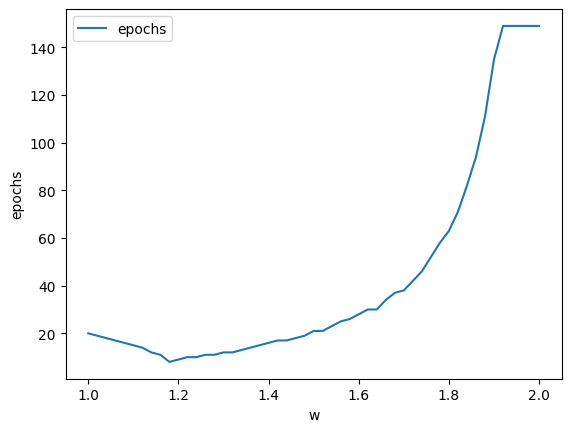

In [42]:
A = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
b = np.array([1, 2, 3])

# 定义初始解向量x0
x0 = np.array([0, 0, 0])

# 调用函数进行高斯-赛德尔迭代
x1,epoch = Successive_over_relaxation(A, b, x0,w = 1.4)

lrs = np.linspace(1,2,51)

epochs = []

for lr in lrs:
    _,epoch = Successive_over_relaxation(A, b, x0,w = lr)
    epochs.append(epoch)
    
plt.plot(lrs,epochs)
plt.xlabel("w")
plt.ylabel("epochs")
plt.legend(["epochs"])

# 梯度下降法
## 核心思想
我们知道,对于一个函数而言,其梯度方向$\nabla(f)$为其增长最快的方向,因此,如果我们希望寻求某个函数的最小值,我们只需要在每一步都按照如下的方式:
$$
x^{i+1}=x^i-\alpha\nabla(f)(x^i)
$$
其中$\alpha$为步长,$\nabla(f)$为方向,形象地来描述即为:在每一步我都去思考下一步往哪里走,走多远.  
因此,我们容易发现,对于一个梯度法,我们只需要定义一个方向,一个距离即可完成迭代.


## 定义
我们首先定义$f(x) = x^TAx / 2 - bx^T$   
此时定义$\varphi(x) = \nabla(f) = Ax - b$   
令$x^{k+1} = x^k + \alpha p^{(k)}$

此时,我们对$f(x)$关于$\alpha$求导,得到:
$$
f(x^{(k)} + \alpha p^{(k)}) = f(x^{(k)}) + \alpha ((Ax^{(k)} - b),p^{(k)}) + \frac{\alpha^2}{2} (Ap^{(k)},p^{(k)}) \\
\frac{df(x + \alpha p^{(k)})}{d\alpha} = (Ax^{(k)} - b,p^{(k)}) + \alpha(Ap^{(k)},p^{(k)}) = 0 \\
\alpha = -\frac{(Ax^{(k)} - b,p^{(k)})}{(Ap^{(k)},p^{(k)})}
$$
此时我们得到了$\alpha$的计算公式,下面我们就该考虑如何计算$p^{(k)}$了,根据方向的不同衍生出了一些不同的迭代方法,下面我们先介绍一种最基本的迭代方法,即梯度下降法:  
由前文的分析,我们知道负梯度方向是函数当前位置的最速下降位置,因此我们很直接的可以取$p^{(k)} = -\nabla(f) = -(Ax^{(k)} - b)$  
我们定义$r^{(k)} = p^{(k)} = -(Ax^{(k)} - b)$  
这时,我们得到了梯度下降的公式:
$$
\alpha = -\frac{(r^{(k)},r^{(k)})}{(Ar^{(k)},r^{(k)})}
$$


In [43]:
def grad_descent(A, b, x0, tol=1e-6, max_iter=150):
    """
    使用梯度下降法解决线性方程组Ax = b的问题。

    参数:
    A: Matrix(List or np.ndarray) - 系数矩阵。
    b: Vector(List or np.ndarray) - 偏置向量。
    x0: Vector(List or np.ndarray) - 初始猜测解向量。
    tol: float,optional - 迭代停止的容差值，用于判断解是否足够接近。
    max_iter: int,optional - 最大迭代次数。
    
    """
    # 复制输入矩阵和向量，以避免原地修改
    A = A.copy()
    b = b.copy()
    x0 = x0.copy()
    
    # 计算初始残差
    r0 = b - np.dot(A, x0)
    r0 = b - np.dot(A,x0)  ## 初始残差
    i = 0  ## 迭代次数
    
    # 使用梯度下降法进行迭代，直到残差足够小或达到最大迭代次数
    while np.linalg.norm(r0) > tol and i < max_iter:
        # 选择P作为当前残差
        P = r0
        # 计算A作用于P的结果
        A_P = np.dot(A, P)
        # 计算alpha值，用于更新解
        alpha = np.dot(P, r0) / np.dot(P, A_P)
        # 更新解向量
        x0 = x0 + alpha * P
        # 更新残差
        r0 -= alpha * A_P
        i += 1
    
    # 检查是否达到最大迭代次数
    if i < max_iter:
        # 如果未达到最大迭代次数，解足够接近时，四舍五入并返回解
        x = np.around(x0, decimals=4)
    else:
        # 如果达到最大迭代次数，返回当前残差的范数和解
        residual = np.linalg.norm(r0)
        x = np.around(x0, decimals=4)
    
    return x, i

In [44]:
A = np.array(
    [
        [10,0],
        [0,1]
    ]
).astype(np.float64)

b = np.array([8,5]).astype(np.float64)

x0 = np.array([1,1]).astype(np.float64)

x,iter = grad_descent(A,b,x0)

x,iter


(array([0.8, 5. ]), 54)

我们很容易能够发现,梯度下降法每次前进后,下一次的方向与上一次的方向必定`正交`,即:
$$
P_{k+1} \perp P_{k} 
$$
这就意味着,我们在每次前进后必须沿着`该点切平面内`垂直与上一次的方向前进,尽管我们在当前时间步内取得了局部的最小值,但这并不意味着在全局内我们是最优策略,转化为Code方面的来看,也就是grad_descent采用的是`greedy`(贪心)策略,但是实际上,我们面临的问题并不都是贪心的.  
在这种意义上,我们或许需要寻找一个相对来说收敛更快的的算法.  
这也就引出了我们下面定义的共轭梯度法

# 共轭梯度法（Conjugate Gradient Method）
## 简介
共轭梯度法是一种求解线性系统(Ax=b)的迭代算法，其中(A)是对称正定矩阵。该方法在解决大型稀疏线性方程组时特别有效，因为它仅需矩阵的乘法操作而不需要直接存储或计算矩阵的逆或分解。共轭梯度法结合了梯度下降法的思想与共轭方向的概念，能够沿着最优路径快速收敛到最小值。

## 基本原理
### 数学支撑
在寻找前进方向时,我们并不按照常规意义上的正交方向,而是按照A-共轭的正交法则即
$$
(u,v)_A = u^TAv
$$
这具有较为直观的几何意义,即使得$$(Ap^{(i)},p^{(j)}) = 0,\forall i \neq j$$
也就是在系数矩阵作用下,仍然可以有一个方向正交,这显然会减少迭代次数.  
在经过理论推理后,我们可以得到下述迭代系数:
$$
r^{(0)} = b - A x^{(0)},p^{(0)} = r^{(0)}\\
\alpha_k = \frac{(r^{(k)},r^{(k)})}{(Ap^{(k)},p^{(k)})}\\
x^{(k+1)} = x^{(k)} + \alpha_k p^{(k)}\\
r^{(k+1)} = r^{(k)} - \alpha_k Ap^{(k)},\beta_k = \frac{(r^{(k+1)},r^{(k+1)})}{(r^{(k)},r^{(k)})}\\
p^{(k+1)} = r^{(k+1)} + \beta_k p^{(k)}
$$
### 初始设置
* 初始点：选择一个初始估计$x_0$。
* 初始残差：计算初始残差$r_0 = b - Ax_0$.
* 搜索方向：第一个搜索方向设为初始残差的方向，即$p_0 = r_0$。
### 迭代过程
对于第(k)次迭代（$k=0,1,2,...$）：

* 计算步长：找到使得目标函数减小最多的步长$\alpha_k$，通过最小化沿$p_k$方向的目标函数，通常使用瑞利商（Rayleigh quotient）的下降条件 确定： $$ \alpha_k = \frac{r_k^T r_k}{p_k^T Ap_k} $$
* 更新解：根据步长更新解的估计： $$x_{k+1} = x_k + \alpha_k p_k $$
* 计算新残差： $$ r_{k+1} = r_k - \alpha_k Ap_k $$
* 共轭条件与新搜索方向：为了保证搜索方向间的共轭性，下一个搜索方向由当前残差和前一个搜索方向线性组合得到： $$ p_{k+1} = r_{k+1} + \beta_k p_k $$ 其中，$\beta_k$是通过不同的公式计算得到，以确保共轭性，常见的一种选择是Fletcher-Reeves公式： $$ \beta_k = \frac{r_{k+1}^T r_{k+1}}{r_k^T r_k} $$
* 收敛判断
迭代通常在残差的范数小于某个预设的阈值或达到预定的最大迭代次数时停止。

## 性质
* 收敛性：共轭梯度法对于对称正定矩阵保证线性收敛，且在最理想情况下（矩阵特征值良好分布时），可以达到二次收敛速度。
* 存储效率：相比其他直接求解方法，共轭梯度法不需要存储矩阵(A)的逆或进行矩阵分解，特别适合大规模稀疏矩阵问题。
* 计算效率：每一步迭代主要涉及矩阵向量乘法，这是许多科学计算软件高效实现的操作。
* 无需精确矩阵信息：仅需能够计算矩阵(A)与向量的乘积即可，适用于那些矩阵不易直接获得但乘法可计算的情形。

In [45]:
def check_symmetric_positive_definite(A):
    """
    检查矩阵是否是对称正定的。
    """
    A_transpose = A.T
    if not np.allclose(A, A_transpose, atol=1e-8):
        raise ValueError("矩阵A不是对称的。")
    eigenvalues = np.linalg.eigvals(A)
    if not np.all(eigenvalues > 0):
        raise ValueError("矩阵A不是正定的。")

def AspaceDot(A, u, v):
    """
    计算向量u和v在矩阵A定义下的点积。

    参数:
    A: _Matrix_ - 矩阵A,要求为对称正定矩阵。
    u: _Vector_ - 第一个向量。
    v: _Vector_ - 第二个向量。

    返回值:
    _float/integer_ - u和v在矩阵A定义下的点积结果。
    """

    # 确保A是对称正定的
    check_symmetric_positive_definite(A)
    
    return np.dot(u, np.dot(A, v))


def conjugate_gradient(A, b, x0, tol=1e-6, max_iter=150, output_key=False):
    """
    使用共轭梯度法解决线性方程组Ax=b。

    参数:
    A: Matrix(List or np.ndarray) - 系数矩阵，要求为对称正定矩阵。
    b: vector(List or np.ndarray) - 右侧常数向量。
    x0: vector(List or np.ndarray) - 初始猜测解向量。
    tol: float, optional - 收敛容差,默认为1e-6。
    max_iter: int, optional - 最大迭代次数,默认为150。
    output_key: bool - 是否输出迭代信息,默认为False。

    返回值:
    vector(List or np.ndarray) - 线性方程组的解向量。
    """

    # 复制输入矩阵和向量，以避免修改原始数据
    A = A.copy()
    b = b.copy()
    x0 = x0.copy()

    # 初始化残差向量
    r = b - np.dot(A, x0)
    P = [r]

    i = 0
    while i < max_iter and np.linalg.norm(r) > tol:
        oldr = r
        # 计算alpha值
        alpha = np.dot(oldr, oldr) / np.dot(P[-1], np.dot(A, P[-1]))

        # 更新解向量
        x0 = x0 + alpha * P[-1]

        # 更新残差向量
        r = oldr - alpha * np.dot(A, P[-1])

        # 计算beta值
        beta = np.dot(r, r) / np.dot(oldr, oldr)

        # 更新共轭向量
        t = r + beta * P[-1]

        P.append(t)

        i += 1

    # 判断是否达到最大迭代次数
    if i == max_iter:
        x = np.around(x0, decimals=5)
        residual = np.linalg.norm(r)

        # 输出迭代信息
        if output_key:
            print(f"Iterator:{max_iter},算法未收敛,残差为:{residual},x为:{x}")
    else:
        x = np.around(x0, decimals=5)

        # 输出迭代信息
        if output_key:
            print(f"Iterator:{i},算法收敛.\nx为:{x}")

    return x, i

In [46]:
A = np.array(
    [
        [14,0,8],
        [0,1,0],
        [8,0,48]
    ]
).astype(np.float64)

b = np.array([8,5,9]).astype(np.float64)

x0 = np.array([1,1,5]).astype(np.float64)

x,iter = conjugate_gradient(A,b,x0)
x,iter

(array([0.51316, 5.     , 0.10197]), 3)

上机练习1:  
分别利用`Jacobi,Gauss-Seidel,SOR迭代法`计算`Ax = b`,`n = 15`并画出向量`x`的图像
$$
A = \begin{pmatrix}
    \frac{5}{2} & -1 & 0 & \cdots & 0 & -1 \\
    -1 & \frac{5}{2} & -1 & \cdots & 0 & 0 \\
    \vdots & \vdots & \ddots & \ddots & \vdots \\
    -1 & 0 & \cdots & 0 & -1 & \frac{5}{2}
    \end{pmatrix}_{n\times n}

x = \begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
    \end{pmatrix}_{n\times 1}

b = \begin{pmatrix}
    1 \\
    0 \\
    \vdots \\
    0
    \end{pmatrix}_{n\times 1}
$$

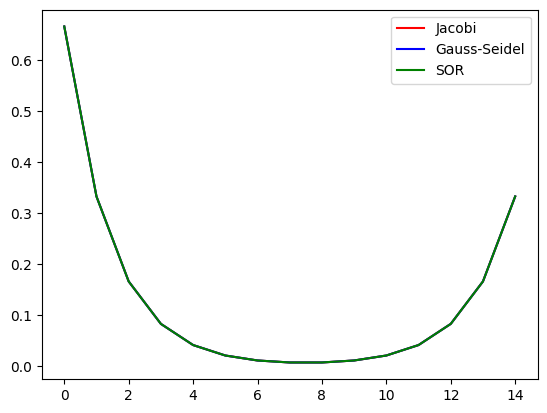

In [47]:
A = np.zeros((15,15)).astype(np.float64)

for i in range(15):
    A[i,i] = 5/2
    if i != 0:
        A[i,i-1] = -1
    if i != 14:
        A[i,i+1] = -1
A[0,14],A[14,0] = -1,-1

b = np.zeros(15).astype(np.float64)
b[0] = 1

x0 = np.random.rand(15).astype(np.float64)

x_jaco,iter_jaco = Jacobi_iteration(A,b,x0)
x_gauss,iter_gauss = Gauss_Seidel_iteration(A,b,x0)
x_SOR,iter_sor = Successive_over_relaxation(A,b,x0,w = 1.8) 

n = 15
plt.plot(range(n),x_jaco,'r-',label='Jacobi')
plt.plot(range(n),x_gauss,'b-',label='Gauss-Seidel')
plt.plot(range(n),x_SOR,'g-',label='SOR')
plt.legend()
plt.show()

ex2:  
尝试自己写`CG`和`Germs`算法程序计算上述例子,体会计算效率的不同

Iterator:8,算法收敛.
x为:[0.66671 0.33338 0.16675 0.0835  0.04199 0.02149 0.01172 0.00781 0.00781
 0.01172 0.02149 0.04199 0.0835  0.16675 0.33338]


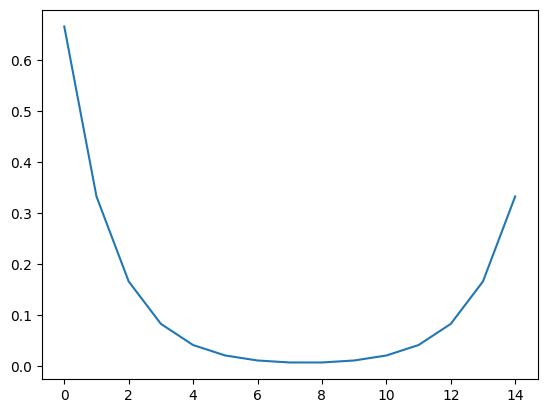

In [48]:
x,iter_CG = conjugate_gradient(A, b, x0, tol=1e-6, max_iter=150,output_key = True)

plt.plot(range(len(x)), x)

In [49]:
A = np.array([[3,1],[1,3]]).astype(float)
x0 = np.array([1,0]).astype(float)

for i in range(30):
    
    x1 = A @ x0
    
    lamb = np.dot(x1.T,x0) / np.dot(x0.T,x0)
    
    x0 = x1 / np.linalg.norm(x1)
    
    
lamb,x0

(4.0, array([0.70710678, 0.70710678]))

In [50]:
def iterOftest(x,omega,max_iter = 200,epsilon = 1e-5):
    x0 = x.copy()
    
    A = np.array([[1-omega,-1/2 * omega],[-1/2 * omega,1-omega]]).astype(np.float64)
    b = np.array([omega / 2,3 * omega / 2]).astype(np.float64)
    
    for i in range(max_iter):
        
        x1 = A @ x0 + b
        
        if np.linalg.norm(x1-x0) < epsilon:
            
            return (x1,i)
        
        x0 = x1
        
    return (x1,max_iter)

1.2966666666666666


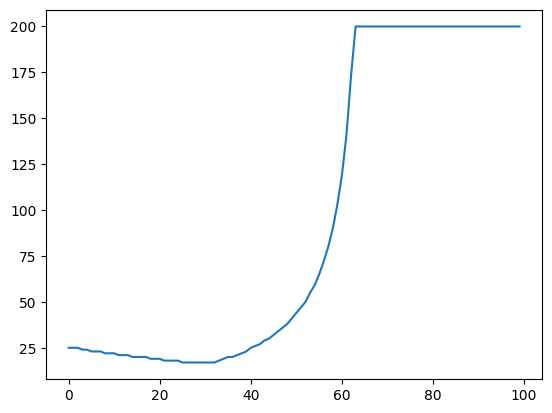

In [51]:
x = np.random.randn(2).reshape(-1,1).astype(np.float64)

iter_count = [iterOftest(x,2/3 + 0.01 *i)[1] for i in range(100)]

flag = 0

for i,iter_c in enumerate(iter_count):
    
    if iter_c == 200 and flag == 0:
        
        flag = 1
        
        print(i * 0.01 + 2/3)

plt.plot([i for i in range(100)],iter_count)